# ⚜ 붓꽃 품종 분류

## 📦 데이터 준비

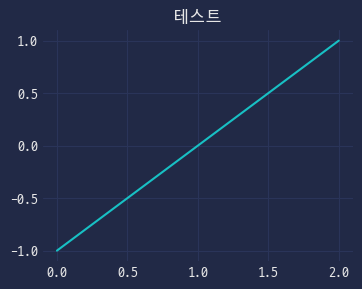

In [90]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

In [91]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


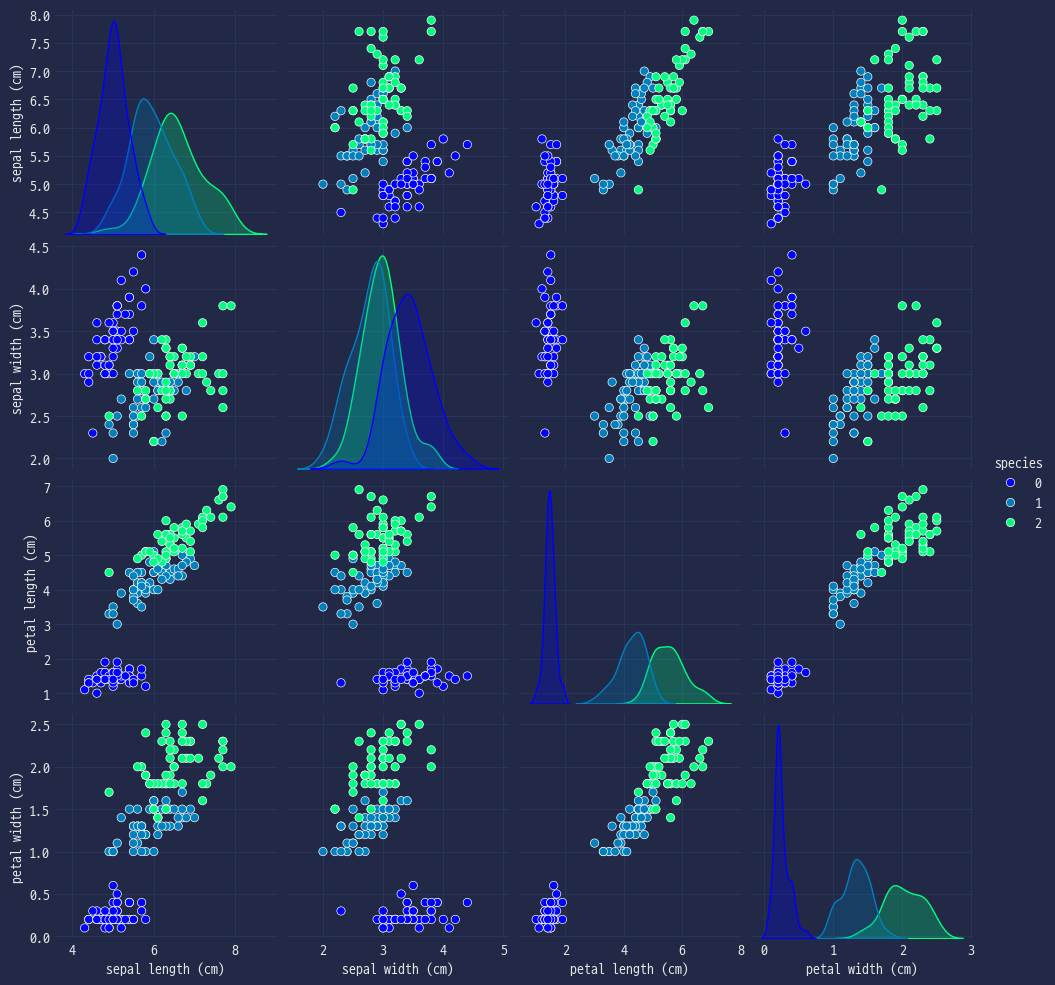

In [92]:
sns.pairplot(data=df_iris, hue='species', palette='winter')
plt.show()

## 🎛️ 독립변수와 종속변수

In [93]:
from sklearn.model_selection import train_test_split

X = feature
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

## 🧠 모델 생성 및 학습

In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
from sklearn.metrics import accuracy_score, classification_report

pred = model.predict(X_test)

print('='*53)
print(classification_report(y_test, pred))
print(f'정확도: {accuracy_score(y_test, pred)}')
print('='*53)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

정확도: 0.9473684210526315


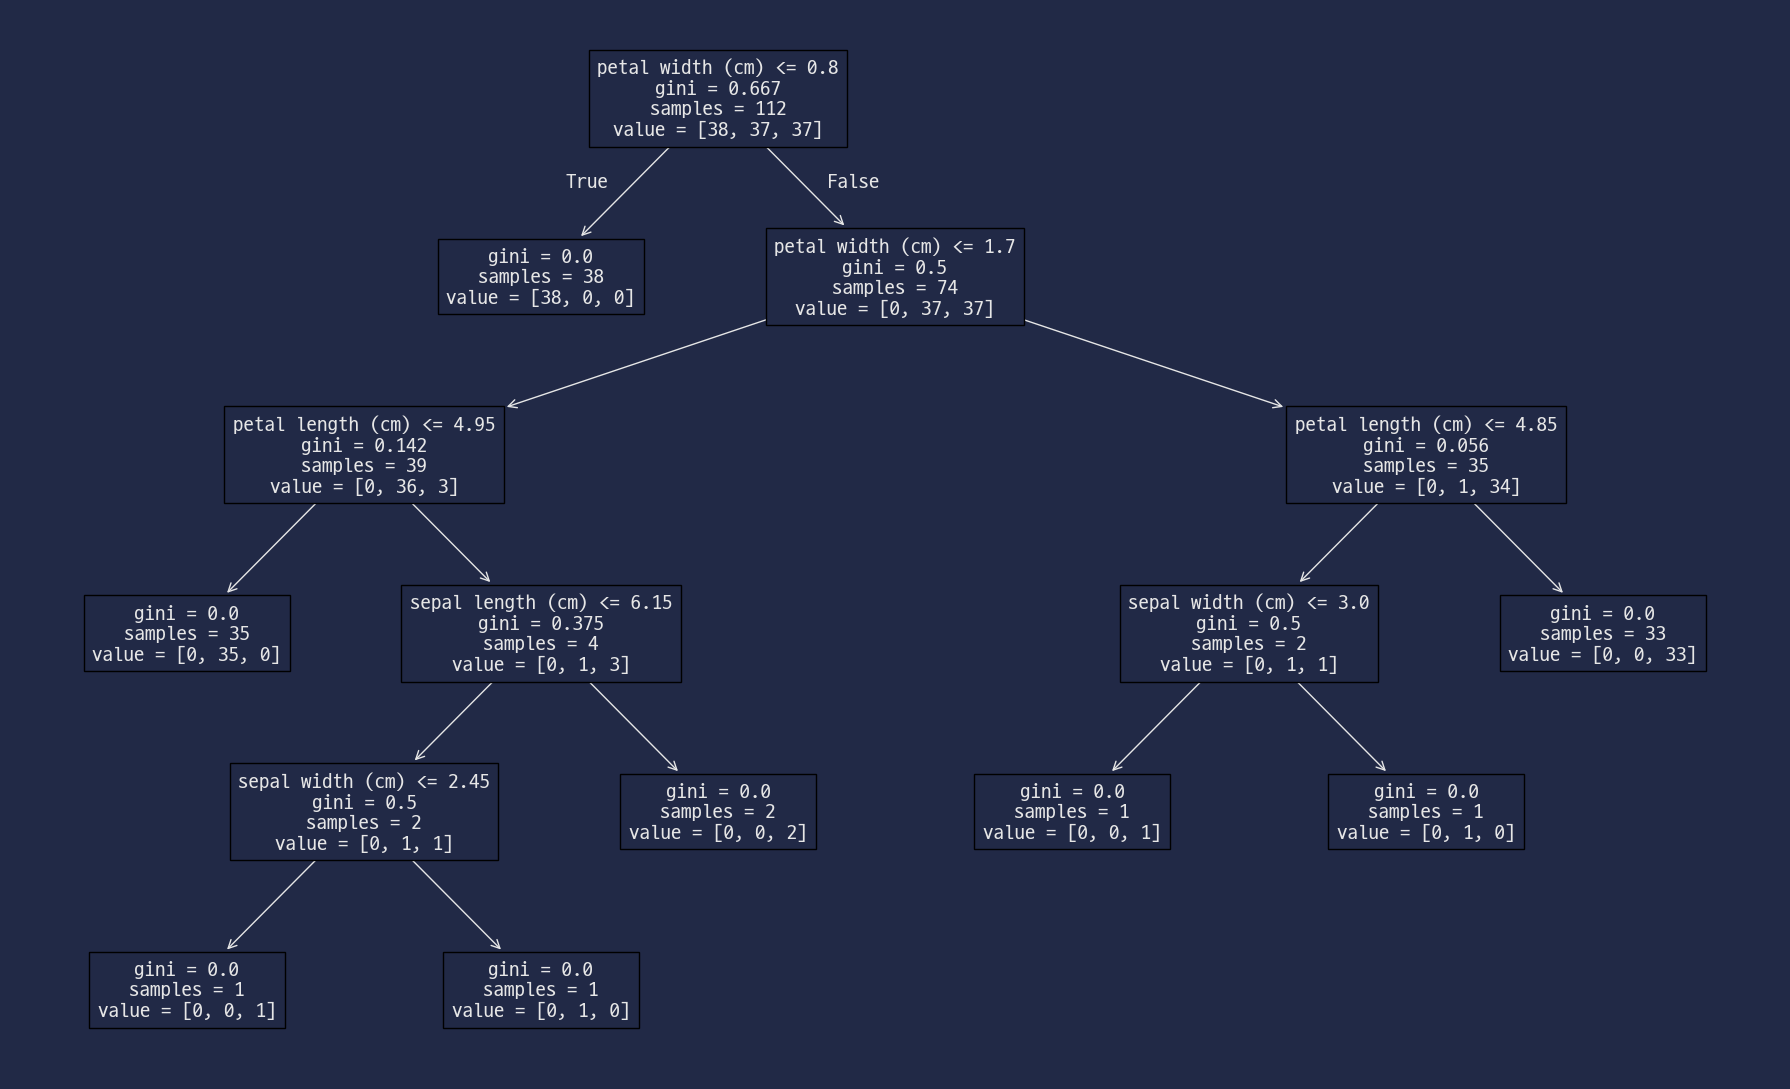

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 11))
plot_tree(model, feature_names=feature_name)
plt.tight_layout()
plt.show()

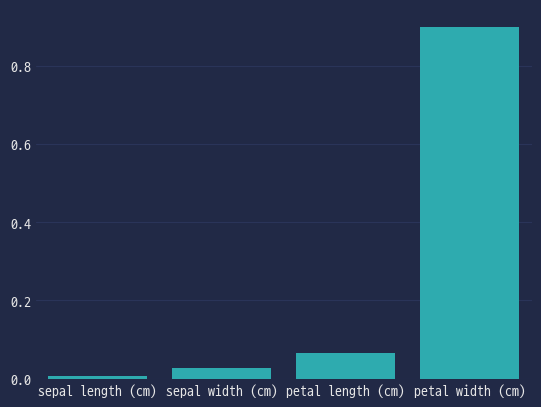

In [97]:
sns.barplot(x=feature_name, y=model.feature_importances_)
plt.show()

## ⚖️ 교차 검증을 직접 해보자

In [112]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, val_idx in kf.split(X_train):
    X_tr, y_tr = X_train[tr_idx], y_train[tr_idx]
    X_val, y_val = X_train[val_idx], y_train[val_idx]
    
    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)
    score = accuracy_score(y_val, pred)
    scores.append(score)

print(np.mean(scores))

0.9379446640316207
